In [1]:
import pymongo
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

params = {'text.usetex' : True,
          'font.size' : 14,
          'font.family' : 'lmodern',
          }
plt.rcParams.update(params) 

MONGO_HOST = "localhost"
MONGO_PORT = 27017

mongo_connection = pymongo.MongoClient("mongodb://"+MONGO_HOST+":"+str(MONGO_PORT), maxPoolSize=None)

# Arbitrage Distances

## Ethereum

In [2]:
cursor = mongo_connection["ethereum"]["mev_arbitrage_opportunities"].find()
ethereum_arbitrage_block_distances = list()
ethereum_arbitrage_total = 0
for document in cursor:
    ethereum_arbitrage_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] != None:
            ethereum_arbitrage_block_distances.append(opportunity["swap"]["distance"])

In [3]:
print("Block Distance", "\t", "Count")
print("-----------------------------")
for i in range(101):
    print(i, "\t\t", ethereum_arbitrage_block_distances.count(i))
print("-----------------------------")
print("Total", "\t\t", len(ethereum_arbitrage_block_distances))

Block Distance 	 Count
-----------------------------
0 		 539894
1 		 302157
2 		 144925
3 		 72438
4 		 43766
5 		 29757
6 		 21677
7 		 16838
8 		 13617
9 		 11258
10 		 9694
11 		 8160
12 		 6999
13 		 6198
14 		 5520
15 		 4982
16 		 4627
17 		 4129
18 		 3636
19 		 3527
20 		 3292
21 		 3127
22 		 2813
23 		 2656
24 		 2558
25 		 2431
26 		 2243
27 		 2087
28 		 2039
29 		 1902
30 		 1850
31 		 1780
32 		 1613
33 		 1620
34 		 1508
35 		 1473
36 		 1497
37 		 1450
38 		 1331
39 		 1223
40 		 1307
41 		 1175
42 		 1155
43 		 1155
44 		 1152
45 		 1086
46 		 1111
47 		 960
48 		 975
49 		 969
50 		 944
51 		 926
52 		 956
53 		 882
54 		 847
55 		 824
56 		 809
57 		 759
58 		 719
59 		 726
60 		 752
61 		 688
62 		 712
63 		 645
64 		 634
65 		 676
66 		 668
67 		 709
68 		 624
69 		 600
70 		 599
71 		 622
72 		 543
73 		 598
74 		 561
75 		 539
76 		 482
77 		 558
78 		 505
79 		 539
80 		 481
81 		 488
82 		 456
83 		 497
84 		 494
85 		 459
86 		 462
87 		 430
88 		 449
89 		 4

In [4]:
print("Total number of arbitrages:", ethereum_arbitrage_total)
print("Number of detected opportunities:", len(ethereum_arbitrage_block_distances), "("+str(round(len(ethereum_arbitrage_block_distances)/ethereum_arbitrage_total*100.0))+"%)")

Total number of arbitrages: 1405433
Number of detected opportunities: 1335441 (95%)


In [5]:
cursor = mongo_connection["ethereum"]["mev_arbitrage_opportunities"].find()
ethereum_tx_distances_arbitrage = list()
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] == 0:
            ethereum_tx_distances_arbitrage.append(opportunity["arbitrage"]["transaction_index"]-opportunity["swap"]["transaction_index"])

Number of transaction distances measured: 539894
Number of transaction distances of 1: 390137 (72%)
Min transaction distance found: 1
Max transaction distance found: 1042


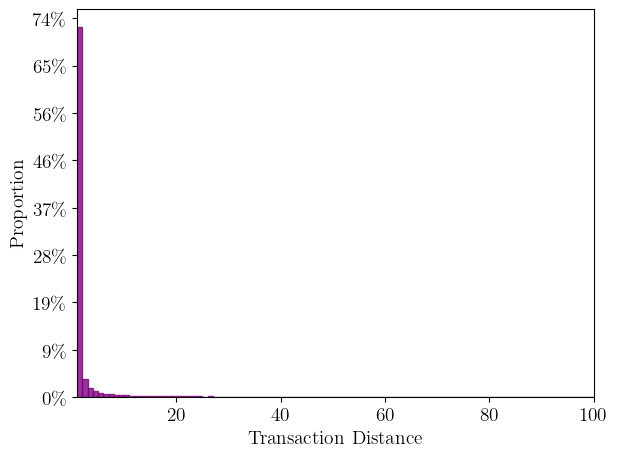

In [6]:
print("Number of transaction distances measured:", len(ethereum_tx_distances_arbitrage))
print("Number of transaction distances of 1:", ethereum_tx_distances_arbitrage.count(1), "("+str(round(ethereum_tx_distances_arbitrage.count(1)/len(ethereum_tx_distances_arbitrage)*100.0))+"%)")
print("Min transaction distance found:", min(ethereum_tx_distances_arbitrage))
print("Max transaction distance found:", max(ethereum_tx_distances_arbitrage))

fig, ax = plt.subplots()
ax.hist(ethereum_tx_distances_arbitrage, edgecolor='purple', color='purple', alpha=0.8, bins=max(ethereum_tx_distances_arbitrage))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(ethereum_tx_distances_arbitrage)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(ethereum_tx_distances_arbitrage), 100)
fig.tight_layout()
plt.show()

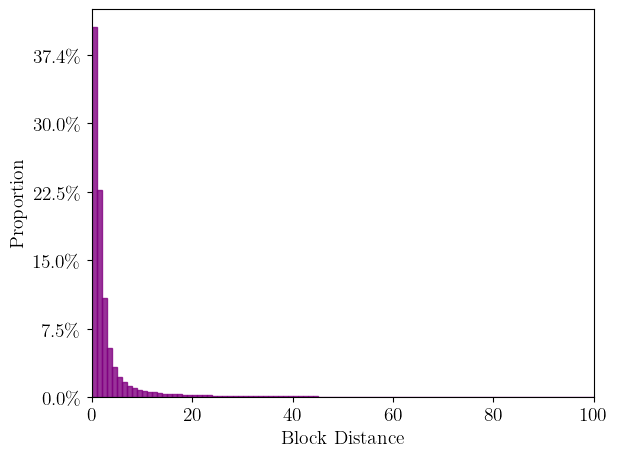

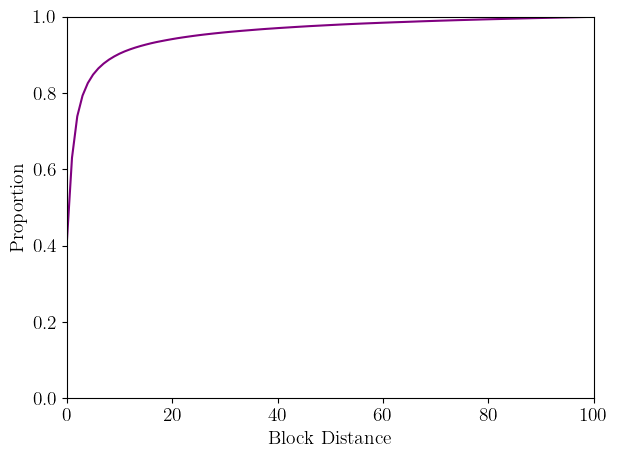

In [7]:
fig, ax = plt.subplots()
ax.hist(ethereum_arbitrage_block_distances, edgecolor='purple', color='purple', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(ethereum_arbitrage_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
count, bins_count = np.histogram(ethereum_arbitrage_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='purple') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## Arbitrum

In [8]:
cursor = mongo_connection["arbitrum"]["mev_arbitrage_opportunities"].find()
arbitrum_classic_arbitrage_block_distances = list()
arbitrum_nitro_arbitrage_block_distances = list()
arbitrum_arbitrage_total = 0
for document in cursor:
    arbitrum_arbitrage_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] != None:
            if opportunity["arbitrage"]["block_number"] < 22207817:
                arbitrum_classic_arbitrage_block_distances.append(opportunity["swap"]["distance"])
            else:
                arbitrum_nitro_arbitrage_block_distances.append(opportunity["swap"]["distance"])

In [9]:
print("Block Distance", "\t", "Count (Classic)", "\t",  "Count (Nitro)")
print("--------------------------------------------------------------------------")
for i in range(101):
    print(i, "\t\t", arbitrum_classic_arbitrage_block_distances.count(i), "\t\t\t", arbitrum_nitro_arbitrage_block_distances.count(i))
print("--------------------------------------------------------------------------")
print("Total", "\t\t", len(arbitrum_classic_arbitrage_block_distances), "\t\t\t", len(arbitrum_nitro_arbitrage_block_distances))

Block Distance 	 Count (Classic) 	 Count (Nitro)
--------------------------------------------------------------------------
0 		 3772 			 85269
1 		 85825 			 821576
2 		 47981 			 174218
3 		 20178 			 71405
4 		 12096 			 42624
5 		 8657 			 29980
6 		 6335 			 22338
7 		 4796 			 16236
8 		 3558 			 13376
9 		 2844 			 11152
10 		 2401 			 9215
11 		 1900 			 7820
12 		 1698 			 6892
13 		 1447 			 5869
14 		 1280 			 5276
15 		 1097 			 4777
16 		 997 			 4445
17 		 960 			 4350
18 		 834 			 4166
19 		 719 			 3964
20 		 689 			 3867
21 		 732 			 3406
22 		 609 			 3270
23 		 576 			 2861
24 		 554 			 2833
25 		 525 			 2652
26 		 469 			 2420
27 		 465 			 2184
28 		 451 			 2187
29 		 428 			 2090
30 		 381 			 1811
31 		 347 			 1709
32 		 367 			 1586
33 		 367 			 1412
34 		 316 			 1401
35 		 329 			 1314
36 		 329 			 1268
37 		 289 			 1309
38 		 300 			 1214
39 		 277 			 1254
40 		 256 			 1069
41 		 240 			 1042
42 		 225 			 1019
43 		 213 			 969
44 		 239 			 942
4

In [10]:
print("Total number of arbitrages:", arbitrum_arbitrage_total)
print("Number of detected opportunities:", len(arbitrum_classic_arbitrage_block_distances+arbitrum_nitro_arbitrage_block_distances), "("+str(round(len(arbitrum_classic_arbitrage_block_distances+arbitrum_nitro_arbitrage_block_distances)/arbitrum_arbitrage_total*100.0))+"%)")

Total number of arbitrages: 1746083
Number of detected opportunities: 1648728 (94%)


In [11]:
cursor = mongo_connection["arbitrum"]["mev_arbitrage_opportunities"].find()
arbitrum_tx_distances_arbitrage = list()
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] == 0:
            arbitrum_tx_distances_arbitrage.append(opportunity["arbitrage"]["transaction_index"]-opportunity["swap"]["transaction_index"])

Number of transaction distances measured: 89041
Number of transaction distances of 1: 18260 (21%)
Min transaction distance found: 1
Max transaction distance found: 119


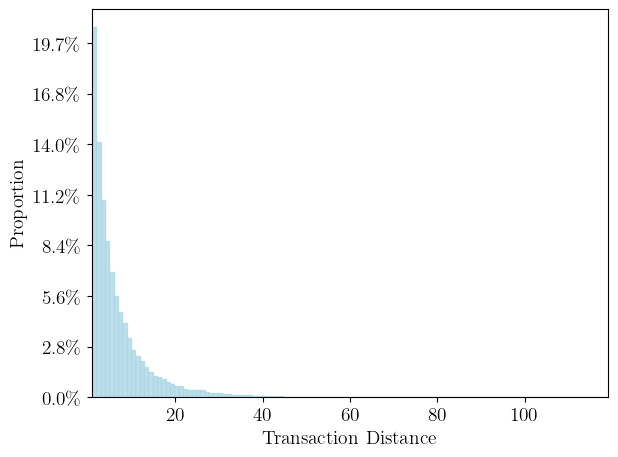

In [12]:
print("Number of transaction distances measured:", len(arbitrum_tx_distances_arbitrage))
print("Number of transaction distances of 1:", arbitrum_tx_distances_arbitrage.count(1), "("+str(round(arbitrum_tx_distances_arbitrage.count(1)/len(arbitrum_tx_distances_arbitrage)*100.0))+"%)")
print("Min transaction distance found:", min(arbitrum_tx_distances_arbitrage))
print("Max transaction distance found:", max(arbitrum_tx_distances_arbitrage))

fig, ax = plt.subplots()
ax.hist(arbitrum_tx_distances_arbitrage, edgecolor='LightBlue', color='LightBlue', alpha=0.8, bins=max(arbitrum_tx_distances_arbitrage))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(arbitrum_tx_distances_arbitrage)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(arbitrum_tx_distances_arbitrage), max(arbitrum_tx_distances_arbitrage))
fig.tight_layout()
plt.show()

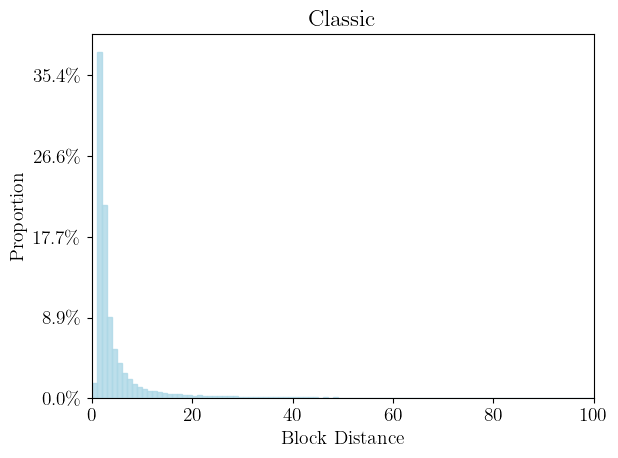

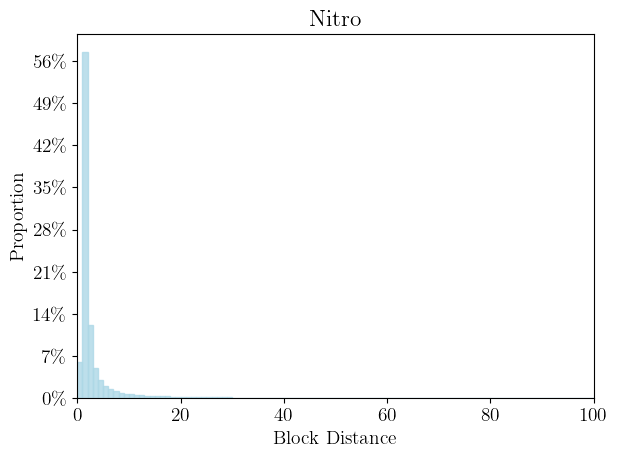

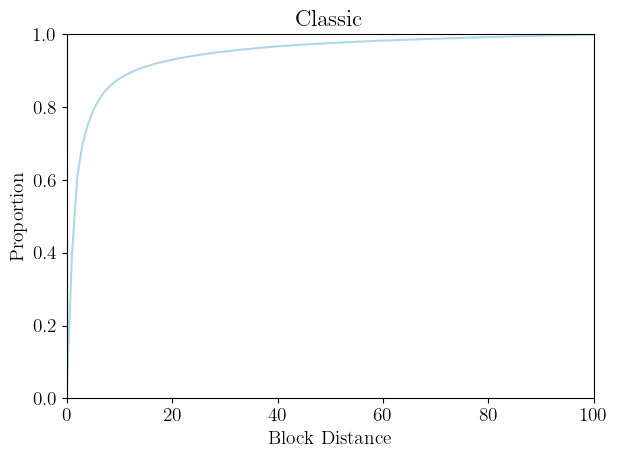

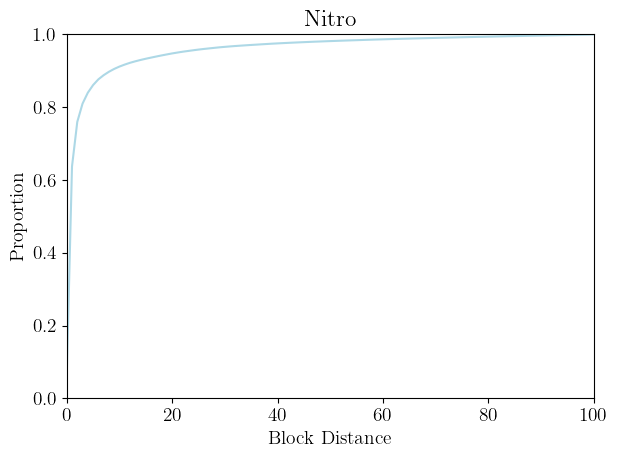

In [13]:
fig, ax = plt.subplots()
plt.title("Classic")
ax.hist(arbitrum_classic_arbitrage_block_distances, edgecolor='LightBlue', color='LightBlue', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(arbitrum_classic_arbitrage_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Nitro")
ax.hist(arbitrum_nitro_arbitrage_block_distances, edgecolor='LightBlue', color='LightBlue', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(arbitrum_nitro_arbitrage_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Classic")
count, bins_count = np.histogram(arbitrum_classic_arbitrage_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='LightBlue') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Nitro")
count, bins_count = np.histogram(arbitrum_nitro_arbitrage_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='LightBlue') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## Optimism

In [14]:
cursor = mongo_connection["optimism"]["mev_arbitrage_opportunities"].find()
optimism_pre_bedrock_arbitrage_block_distances = list()
optimism_post_bedrock_arbitrage_block_distances = list()
optimism_arbitrage_total = 0
for document in cursor:
    optimism_arbitrage_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] != None:
            if opportunity["arbitrage"]["block_number"] < 105235063:
                optimism_pre_bedrock_arbitrage_block_distances.append(opportunity["swap"]["distance"])
            else:
                optimism_post_bedrock_arbitrage_block_distances.append(opportunity["swap"]["distance"])

In [15]:
print("Block Distance", "\t", "Count (Pre-Bedrock)", "\t",  "Count (Post-Bedrock)")
print("--------------------------------------------------------------------------")
for i in range(101):
    print(i, "\t\t", optimism_pre_bedrock_arbitrage_block_distances.count(i), "\t\t\t", optimism_post_bedrock_arbitrage_block_distances.count(i))
print("--------------------------------------------------------------------------")
print("Total", "\t\t", len(optimism_pre_bedrock_arbitrage_block_distances), "\t\t\t", len(optimism_post_bedrock_arbitrage_block_distances))

Block Distance 	 Count (Pre-Bedrock) 	 Count (Post-Bedrock)
--------------------------------------------------------------------------
0 		 0 			 19882
1 		 628513 			 61754
2 		 420653 			 66990
3 		 318054 			 22220
4 		 269649 			 14390
5 		 222221 			 10842
6 		 185803 			 9246
7 		 155811 			 8661
8 		 131787 			 8531
9 		 112147 			 7227
10 		 98606 			 6070
11 		 84220 			 5135
12 		 73376 			 4429
13 		 67507 			 5368
14 		 57806 			 4365
15 		 52503 			 4382
16 		 47101 			 4085
17 		 42702 			 3392
18 		 38563 			 2892
19 		 35841 			 2772
20 		 33144 			 2622
21 		 31016 			 2889
22 		 28482 			 2121
23 		 26463 			 2251
24 		 23659 			 2298
25 		 22849 			 1877
26 		 20895 			 1355
27 		 20066 			 1743
28 		 18432 			 1255
29 		 17408 			 1511
30 		 16150 			 1574
31 		 16052 			 1335
32 		 14049 			 968
33 		 13286 			 1079
34 		 13749 			 1105
35 		 12017 			 1019
36 		 12166 			 756
37 		 11410 			 825
38 		 10307 			 1082
39 		 9965 			 761
40 		 10238 			 643
41 		 939

In [16]:
print("Total number of arbitrage:", optimism_arbitrage_total)
print("Number of detected opportunities:", len(optimism_pre_bedrock_arbitrage_block_distances+optimism_post_bedrock_arbitrage_block_distances), "("+str(round(len(optimism_pre_bedrock_arbitrage_block_distances+optimism_post_bedrock_arbitrage_block_distances)/optimism_arbitrage_total*100.0))+"%)")

Total number of arbitrage: 1153364
Number of detected opportunities: 3987835 (346%)


In [17]:
cursor = mongo_connection["optimism"]["mev_arbitrage_opportunities"].find()
optimism_tx_distances_arbitrage = list()
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] == 0:
            optimism_tx_distances_arbitrage.append(opportunity["arbitrage"]["transaction_index"]-opportunity["swap"]["transaction_index"])

Number of transaction distances measured: 19882
Number of transaction distances of 1: 3227 (16%)
Min transaction distance found: 1
Max transaction distance found: 130


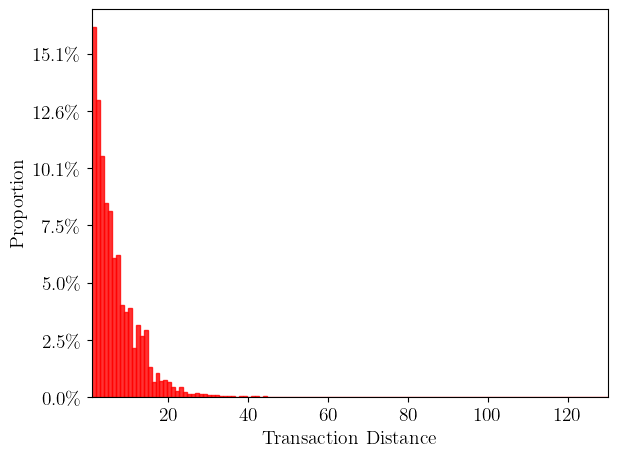

In [18]:
print("Number of transaction distances measured:", len(optimism_tx_distances_arbitrage))
print("Number of transaction distances of 1:", optimism_tx_distances_arbitrage.count(1), "("+str(round(optimism_tx_distances_arbitrage.count(1)/len(optimism_tx_distances_arbitrage)*100.0))+"%)")
print("Min transaction distance found:", min(optimism_tx_distances_arbitrage))
print("Max transaction distance found:", max(optimism_tx_distances_arbitrage))

fig, ax = plt.subplots()
ax.hist(optimism_tx_distances_arbitrage, edgecolor='red', color='red', alpha=0.8, bins=max(optimism_tx_distances_arbitrage))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_tx_distances_arbitrage)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(optimism_tx_distances_arbitrage), max(optimism_tx_distances_arbitrage))
fig.tight_layout()
plt.show()

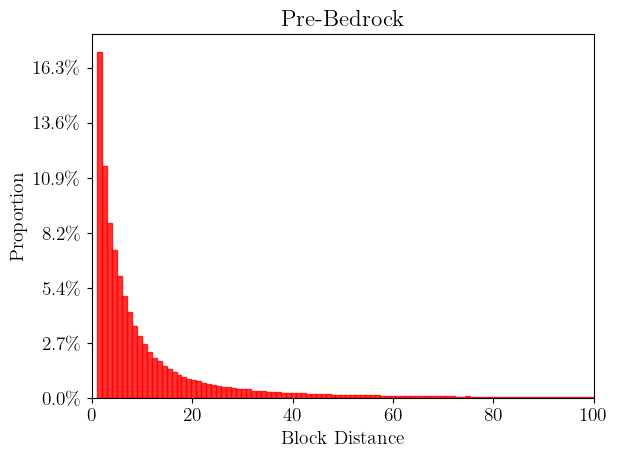

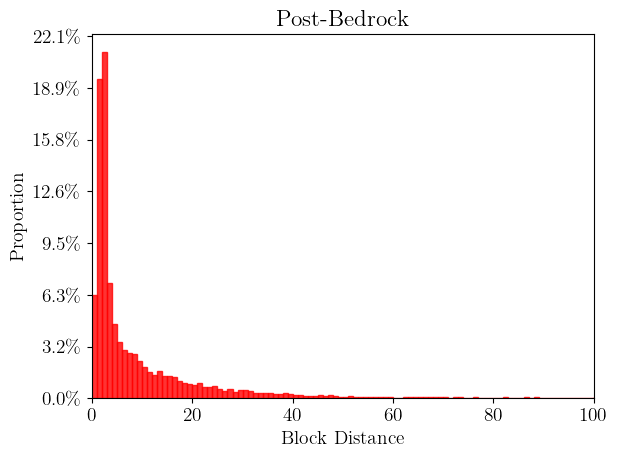

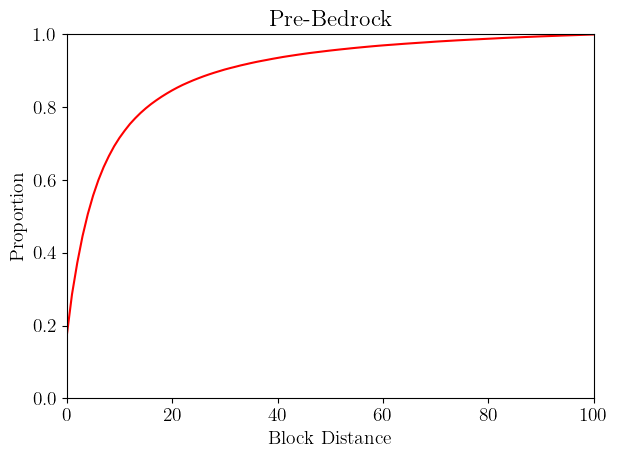

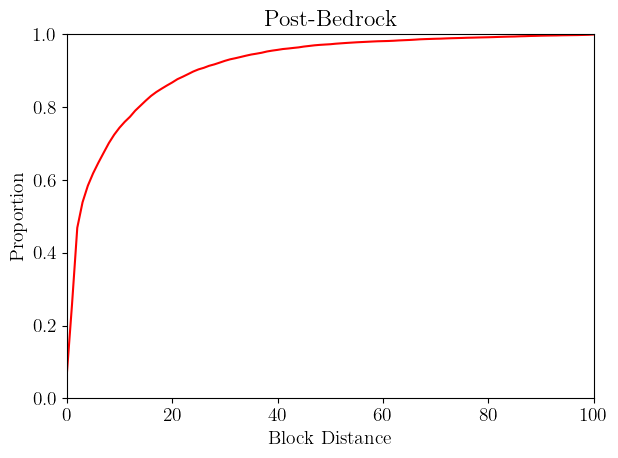

In [19]:
fig, ax = plt.subplots()
plt.title("Pre-Bedrock")
ax.hist(optimism_pre_bedrock_arbitrage_block_distances, edgecolor='red', color='red', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_pre_bedrock_arbitrage_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Post-Bedrock")
ax.hist(optimism_post_bedrock_arbitrage_block_distances, edgecolor='red', color='red', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_post_bedrock_arbitrage_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Pre-Bedrock")
count, bins_count = np.histogram(optimism_pre_bedrock_arbitrage_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='red') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Post-Bedrock")
count, bins_count = np.histogram(optimism_post_bedrock_arbitrage_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='red') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## zkSync

In [20]:
cursor = mongo_connection["zksync"]["mev_arbitrage_opportunities"].find()
zksync_arbitrage_block_distances = list()
zksync_arbitrage_total = 0
for document in cursor:
    zksync_arbitrage_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["swap"]["distance"] != None:
            zksync_arbitrage_block_distances.append(opportunity["swap"]["distance"])

In [21]:
print("Block Distance", "\t", "Count")
print("-----------------------------")
for i in range(101):
    print(i, "\t\t", zksync_arbitrage_block_distances.count(i))
print("-----------------------------")
print("Total", "\t\t", len(zksync_arbitrage_block_distances))

Block Distance 	 Count
-----------------------------
0 		 32132
1 		 22917
2 		 5551
3 		 3917
4 		 2827
5 		 2008
6 		 1722
7 		 1405
8 		 1232
9 		 1052
10 		 947
11 		 931
12 		 803
13 		 787
14 		 698
15 		 658
16 		 651
17 		 612
18 		 496
19 		 525
20 		 503
21 		 457
22 		 433
23 		 418
24 		 391
25 		 389
26 		 382
27 		 342
28 		 313
29 		 306
30 		 314
31 		 301
32 		 281
33 		 239
34 		 264
35 		 247
36 		 227
37 		 236
38 		 223
39 		 226
40 		 216
41 		 191
42 		 182
43 		 176
44 		 169
45 		 166
46 		 169
47 		 153
48 		 162
49 		 161
50 		 154
51 		 159
52 		 135
53 		 140
54 		 135
55 		 140
56 		 122
57 		 112
58 		 116
59 		 130
60 		 117
61 		 104
62 		 127
63 		 116
64 		 129
65 		 88
66 		 111
67 		 98
68 		 101
69 		 87
70 		 100
71 		 87
72 		 93
73 		 73
74 		 77
75 		 65
76 		 73
77 		 74
78 		 84
79 		 65
80 		 80
81 		 90
82 		 88
83 		 74
84 		 69
85 		 77
86 		 54
87 		 77
88 		 67
89 		 56
90 		 71
91 		 61
92 		 57
93 		 57
94 		 73
95 		 72
96 		 54
97 	

In [22]:
print("Total number of arbitrages:", zksync_arbitrage_total)
print("Number of detected opportunities:", len(zksync_arbitrage_block_distances), "("+str(round(len(zksync_arbitrage_block_distances)/zksync_arbitrage_total*100.0))+"%)")

Total number of arbitrages: 108070
Number of detected opportunities: 94807 (88%)


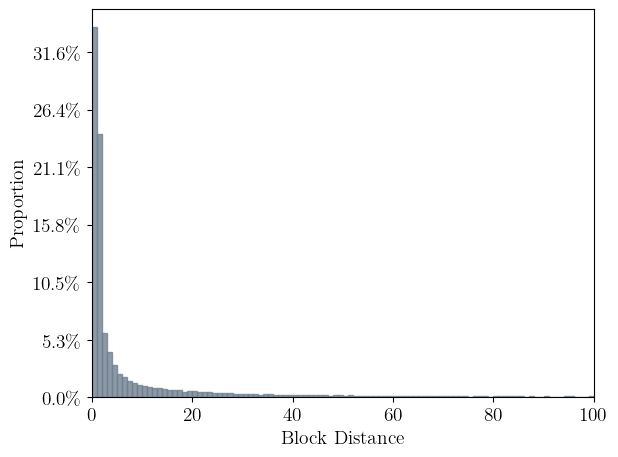

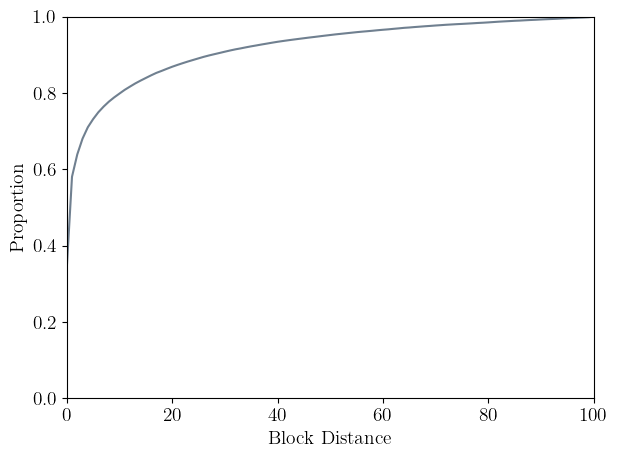

In [23]:
fig, ax = plt.subplots()
ax.hist(zksync_arbitrage_block_distances, edgecolor='slategrey', color='slategrey', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(zksync_arbitrage_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
count, bins_count = np.histogram(zksync_arbitrage_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='slategrey') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

# Liquidation Distances

## Ethereum

In [24]:
cursor = mongo_connection["ethereum"]["mev_liquidation_opportunities"].find()
ethereum_liquidation_block_distances = list()
ethereum_liquidation_total = 0
for document in cursor:
    ethereum_liquidation_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] != None:
            ethereum_liquidation_block_distances.append(opportunity["oracle_update"]["distance"])

In [25]:
print("Block Distance", "\t", "Count")
print("-----------------------------")
for i in range(101):
    print(i, "\t\t", ethereum_liquidation_block_distances.count(i))
print("-----------------------------")
print("Total", "\t\t", len(ethereum_liquidation_block_distances))

Block Distance 	 Count
-----------------------------
0 		 13840
1 		 4258
2 		 1656
3 		 939
4 		 595
5 		 373
6 		 323
7 		 233
8 		 175
9 		 193
10 		 189
11 		 153
12 		 150
13 		 130
14 		 116
15 		 116
16 		 112
17 		 93
18 		 108
19 		 89
20 		 105
21 		 85
22 		 89
23 		 95
24 		 90
25 		 103
26 		 101
27 		 85
28 		 84
29 		 79
30 		 95
31 		 86
32 		 71
33 		 73
34 		 74
35 		 81
36 		 85
37 		 68
38 		 52
39 		 51
40 		 61
41 		 59
42 		 62
43 		 56
44 		 50
45 		 54
46 		 58
47 		 60
48 		 59
49 		 55
50 		 40
51 		 47
52 		 40
53 		 49
54 		 40
55 		 43
56 		 43
57 		 51
58 		 45
59 		 51
60 		 42
61 		 52
62 		 46
63 		 53
64 		 30
65 		 36
66 		 30
67 		 40
68 		 29
69 		 36
70 		 42
71 		 40
72 		 33
73 		 34
74 		 36
75 		 37
76 		 40
77 		 36
78 		 36
79 		 29
80 		 37
81 		 34
82 		 30
83 		 31
84 		 21
85 		 25
86 		 22
87 		 34
88 		 30
89 		 24
90 		 15
91 		 22
92 		 28
93 		 25
94 		 24
95 		 22
96 		 23
97 		 19
98 		 31
99 		 21
100 		 12
----------------------

In [26]:
print("Total number of liquidations:", ethereum_liquidation_total)
print("Number of detected opportunities:", len(ethereum_liquidation_block_distances), "("+str(round(len(ethereum_liquidation_block_distances)/ethereum_liquidation_total*100.0))+"%)")

Total number of liquidations: 54772
Number of detected opportunities: 27803 (51%)


In [27]:
cursor = mongo_connection["ethereum"]["mev_liquidation_opportunities"].find()
ethereum_tx_distances_liquidation = list()
flashbots_bundles = 0
flashbots_gas_prices = list()
non_flashbots_gas_prices = list()
non_flashbots_gas_price_deltas = list()
non_flashbots_bundles = 0
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] == 0:
            if len(opportunity["oracle_update"]["transactions"]) > 0:
                shortest_distance = None
                oracle_update_flashbots_bundle_index = None
                for transaction in opportunity["oracle_update"]["transactions"]:
                    if transaction["transaction_index"] != None:
                        if shortest_distance == None or opportunity["liquidation"]["transaction_index"] - transaction["transaction_index"] < shortest_distance:
                            shortest_distance = opportunity["liquidation"]["transaction_index"]-transaction["transaction_index"]
                            oracle_update_flashbots_bundle_index = transaction["flashbots_bundle_index"]
                if shortest_distance != None:
                    if oracle_update_flashbots_bundle_index != None and oracle_update_flashbots_bundle_index == opportunity["liquidation"]["flashbots_bundle_index"]:
                        flashbots_bundles += 1
                        flashbots_gas_prices.append(opportunity["liquidation"]["gas_price"])
                        shortest_distance = 1
                    elif shortest_distance == 1:
                        non_flashbots_bundles += 1
                        non_flashbots_gas_prices.append(opportunity["liquidation"]["gas_price"])
                        if opportunity["liquidation"]["gas_price"] > 0:
                            delta = None
                            if opportunity["liquidation"]["gas_price"] in [t["gas_price"] for t in opportunity["oracle_update"]["transactions"]]:
                                delta = 0
                            elif opportunity["liquidation"]["gas_price"] < min([t["gas_price"] for t in opportunity["oracle_update"]["transactions"]]):
                                delta = -1
                            elif opportunity["liquidation"]["gas_price"] > max([t["gas_price"] for t in opportunity["oracle_update"]["transactions"]]):
                                delta = 1
                        non_flashbots_gas_price_deltas.append(delta)
                    ethereum_tx_distances_liquidation.append(shortest_distance)

In [28]:
print("Flashbots bundles where liquidation transaction has gas price 0:", flashbots_gas_prices.count(0))
print("Non Flashbots bundles where liquidation transaction has gas price 0:", non_flashbots_gas_prices.count(0))
print("Non Flashbots bundles where gas price is exactly the same as oracle:", non_flashbots_gas_price_deltas.count(0))
print("Non Flashbots bundles where gas price is smaller than oracle:", non_flashbots_gas_price_deltas.count(-1))
print("Non Flashbots bundles where gas price is larger than oracle:", non_flashbots_gas_price_deltas.count(1))

Flashbots bundles where liquidation transaction has gas price 0: 460
Non Flashbots bundles where liquidation transaction has gas price 0: 20
Non Flashbots bundles where gas price is exactly the same as oracle: 2302
Non Flashbots bundles where gas price is smaller than oracle: 454
Non Flashbots bundles where gas price is larger than oracle: 463


Number of transaction distances measured: 13840
Number of opportunities and liquidations included in same Flashbots bundle: 3017 (22%)
Number of opportunities and liquidations with a distance of 1 and not Flashbot bundles: 3248 (23%)
Number of transaction distances of 1: 6265 (45%)
Min transaction distance found: 1
Max transaction distance found: 494


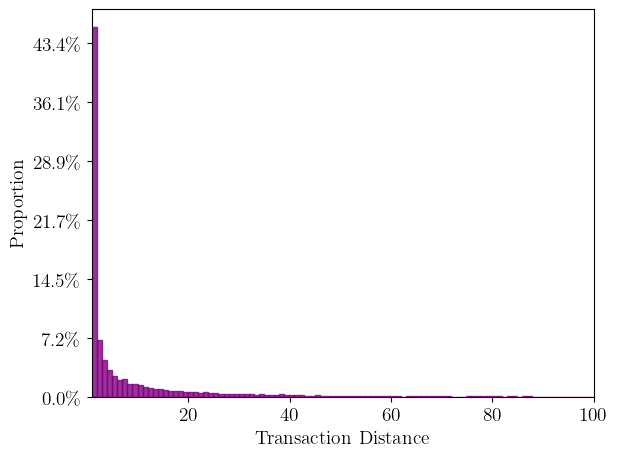

In [29]:
print("Number of transaction distances measured:", len(ethereum_tx_distances_liquidation))
print("Number of opportunities and liquidations included in same Flashbots bundle:", flashbots_bundles, "("+str(round(flashbots_bundles/len(ethereum_tx_distances_liquidation)*100.0))+"%)")
print("Number of opportunities and liquidations with a distance of 1 and not Flashbot bundles:", non_flashbots_bundles, "("+str(round(non_flashbots_bundles/len(ethereum_tx_distances_liquidation)*100.0))+"%)")
print("Number of transaction distances of 1:", ethereum_tx_distances_liquidation.count(1), "("+str(round(ethereum_tx_distances_liquidation.count(1)/len(ethereum_tx_distances_liquidation)*100.0))+"%)")
print("Min transaction distance found:", min(ethereum_tx_distances_liquidation))
print("Max transaction distance found:", max(ethereum_tx_distances_liquidation))

fig, ax = plt.subplots()
ax.hist(ethereum_tx_distances_liquidation, edgecolor='purple', color='purple', alpha=0.8, bins=max(ethereum_tx_distances_liquidation))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(ethereum_tx_distances_liquidation)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(ethereum_tx_distances_liquidation), 100)
fig.tight_layout()
plt.show()

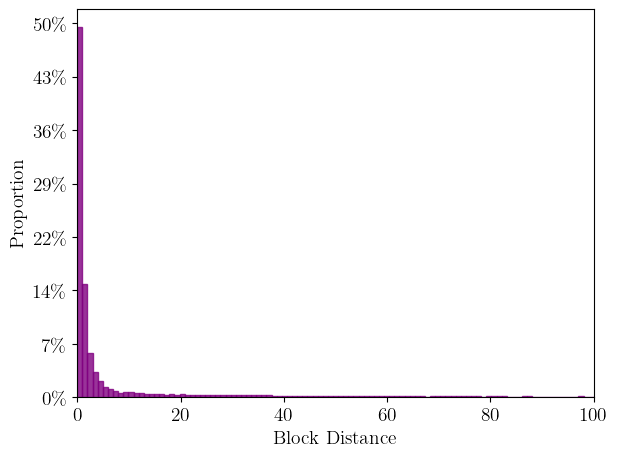

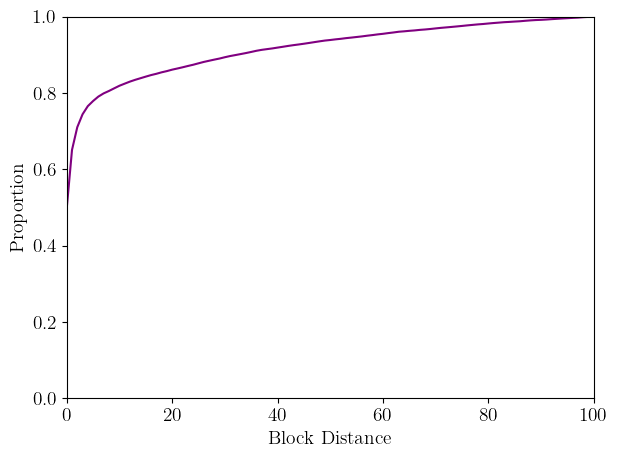

In [30]:
fig, ax = plt.subplots()
ax.hist(ethereum_liquidation_block_distances, edgecolor='purple', color='purple', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(ethereum_liquidation_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
count, bins_count = np.histogram(ethereum_liquidation_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='purple') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## Arbitrum

In [31]:
cursor = mongo_connection["arbitrum"]["mev_liquidation_opportunities"].find()
arbitrum_classic_liquidation_block_distances = list()
arbitrum_nitro_liquidation_block_distances = list()
arbitrum_liquidation_total = 0
for document in cursor:
    arbitrum_liquidation_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] != None:
            if opportunity["liquidation"]["block_number"] < 22207817:
                arbitrum_classic_liquidation_block_distances.append(opportunity["oracle_update"]["distance"])
            else:
                arbitrum_nitro_liquidation_block_distances.append(opportunity["oracle_update"]["distance"])

In [32]:
print("Block Distance", "\t", "Count (Classic)", "\t",  "Count (Nitro)")
print("--------------------------------------------------------------------------")
for i in range(101):
    print(i, "\t\t", arbitrum_classic_liquidation_block_distances.count(i), "\t\t\t", arbitrum_nitro_liquidation_block_distances.count(i))
print("--------------------------------------------------------------------------")
print("Total", "\t\t", len(arbitrum_classic_liquidation_block_distances), "\t\t\t", len(arbitrum_nitro_liquidation_block_distances))

Block Distance 	 Count (Classic) 	 Count (Nitro)
--------------------------------------------------------------------------
0 		 0 			 13
1 		 53 			 674
2 		 73 			 106
3 		 65 			 57
4 		 44 			 46
5 		 29 			 19
6 		 34 			 16
7 		 15 			 12
8 		 15 			 11
9 		 9 			 2
10 		 11 			 6
11 		 14 			 3
12 		 8 			 4
13 		 10 			 6
14 		 9 			 1
15 		 11 			 1
16 		 6 			 2
17 		 5 			 5
18 		 6 			 2
19 		 10 			 0
20 		 8 			 1
21 		 8 			 2
22 		 7 			 3
23 		 9 			 4
24 		 5 			 2
25 		 5 			 6
26 		 9 			 3
27 		 4 			 1
28 		 8 			 1
29 		 5 			 2
30 		 2 			 1
31 		 4 			 5
32 		 5 			 2
33 		 6 			 3
34 		 4 			 1
35 		 4 			 0
36 		 8 			 1
37 		 4 			 0
38 		 6 			 1
39 		 6 			 1
40 		 1 			 0
41 		 10 			 3
42 		 5 			 0
43 		 4 			 0
44 		 2 			 1
45 		 5 			 1
46 		 1 			 0
47 		 2 			 1
48 		 2 			 1
49 		 1 			 3
50 		 4 			 0
51 		 1 			 0
52 		 4 			 2
53 		 4 			 0
54 		 1 			 1
55 		 4 			 0
56 		 2 			 2
57 		 2 			 1
58 		 1 			 1
59 		 2 			 0
60 		 4 			 0
61 		 4

In [33]:
print("Total number of liquidations:", arbitrum_liquidation_total)
print("Number of detected opportunities:", len(arbitrum_classic_liquidation_block_distances+arbitrum_nitro_liquidation_block_distances), "("+str(round(len(arbitrum_classic_liquidation_block_distances+arbitrum_nitro_liquidation_block_distances)/arbitrum_liquidation_total*100.0))+"%)")

Total number of liquidations: 5277
Number of detected opportunities: 1749 (33%)


In [34]:
cursor = mongo_connection["arbitrum"]["mev_liquidation_opportunities"].find()
arbitrum_tx_distances_liquidation = list()
special_cases = list()
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] == 0:
            if len(opportunity["oracle_update"]["transactions"]) > 0:
                shortest_distance = None
                for transaction in opportunity["oracle_update"]["transactions"]:
                    if transaction["transaction_index"] != None:
                        if shortest_distance == None or opportunity["liquidation"]["transaction_index"] - transaction["transaction_index"] < shortest_distance:
                            shortest_distance = opportunity["liquidation"]["transaction_index"]-transaction["transaction_index"]
                if shortest_distance != None:
                    special_cases.append(opportunity)
                    arbitrum_tx_distances_liquidation.append(shortest_distance)

Number of transaction distances measured: 13
Number of transaction distances of 1: 5 (38%)
Min transaction distance found: 1
Max transaction distance found: 9


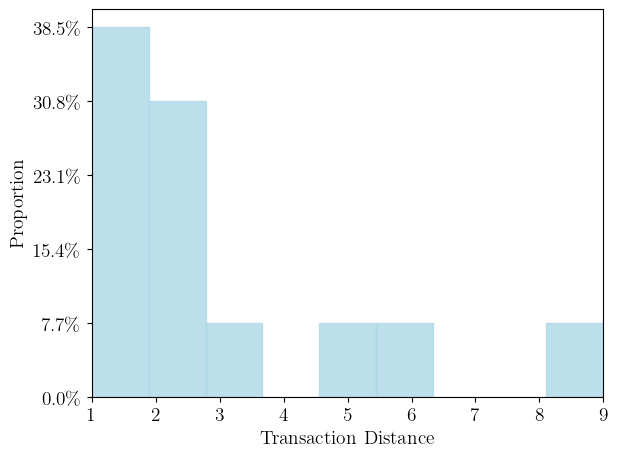

In [35]:
print("Number of transaction distances measured:", len(arbitrum_tx_distances_liquidation))
print("Number of transaction distances of 1:", arbitrum_tx_distances_liquidation.count(1), "("+str(round(arbitrum_tx_distances_liquidation.count(1)/len(arbitrum_tx_distances_liquidation)*100.0))+"%)")
print("Min transaction distance found:", min(arbitrum_tx_distances_liquidation))
print("Max transaction distance found:", max(arbitrum_tx_distances_liquidation))

fig, ax = plt.subplots()
ax.hist(arbitrum_tx_distances_liquidation, edgecolor='LightBlue', color='LightBlue', alpha=0.8, bins=max(arbitrum_tx_distances_liquidation))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(arbitrum_tx_distances_liquidation)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(arbitrum_tx_distances_liquidation), max(arbitrum_tx_distances_liquidation))
fig.tight_layout()
plt.show()

In [36]:
from datetime import datetime

bot_contracts = set()
special_blocks = set()
sorted_special_cases = sorted(special_cases, key=lambda d: d["liquidation"]["block_number"]) 
for special_case in sorted_special_cases:
    special_blocks.add(special_case["liquidation"]["block_number"])
    liquidation = mongo_connection["arbitrum"]["mev_liquidation_results"].find_one({"transaction.hash": special_case["liquidation"]["transaction_hash"]})
    profit = "???"
    if liquidation["total_profit_usd"]:
        profit = round(liquidation["total_profit_usd"])
    bot_contracts.add(liquidation["transaction"]["to"])
    print(special_case["liquidation"]["block_number"], liquidation["transaction"]["to"], datetime.utcfromtimestamp(special_case["liquidation"]["timestamp"]).strftime('%Y-%m-%d %H:%M:%S'), profit, "USD", special_case["liquidation"]["transaction_index"], special_case["oracle_update"]["transactions"][0]["transaction_index"], special_case["liquidation"]["transaction_hash"])

print()
for bot in bot_contracts:
    print(bot)
    cursor = mongo_connection["arbitrum"]["mev_liquidation_results"].find({"transaction.to": bot}).sort([("block_number", pymongo.ASCENDING)])
    for document in cursor:
        if document["block_number"] not in special_blocks:
            result = mongo_connection["arbitrum"]["mev_liquidation_opportunities"].find_one({"opportunities.liquidation.transaction_hash": document["transaction"]["hash"]})
            print(document["block_number"], [opportunity["oracle_update"]["distance"] for opportunity in result["opportunities"]])
        else:
            print(document["block_number"], "*")
    print()

49315129 0xB4a513FD027B06a0E50F8fF40B98f51347Cac090 2022-12-28 03:11:15 61 USD 3 1 0xc094651e5afb86c4471f28b36e01b67cc26e52a3edfdf80f6aa3ef00a9e577ad
107394344 0xc8c61f2d3DC24e1481cC12A07a79Bf67f54b3671 2023-07-03 08:18:47 ??? USD 4 2 0x404c011b6e32ac227f65f3b097036c1235bada9725e878ecb9f39cd625ba0320
114337588 0x615d04B9aB49EE4c08f64fd6cA63AaEdFbaf89F4 2023-07-24 03:41:43 ??? USD 3 2 0x939fad7365cc513712a4d59a2b1cdb3fd859d989fed78e116b066c4988dd65b6
114424260 0x615d04B9aB49EE4c08f64fd6cA63AaEdFbaf89F4 2023-07-24 09:50:26 4806 USD 17 11 0x44abac8558d4a6a032c89f4b54f7a17f367e9541f6429d2bce1838228494e552
119613385 0x615d04B9aB49EE4c08f64fd6cA63AaEdFbaf89F4 2023-08-09 06:16:21 996 USD 6 3 0xe1631a63ddd0cb559fb5899231e6d216937035372652b6558e54ef6ab845e8b9
119942570 0xaF5A165055fc0c34a89F3BCA40baE19fBb7F4975 2023-08-10 06:17:43 323 USD 5 3 0x7f3377300bfa15d0f258945e86cd06806f35fc99ee4e13c371b1f98e0cc8519d
122055618 0xaF5A165055fc0c34a89F3BCA40baE19fBb7F4975 2023-08-16 20:30:06 285 USD 13 1 0

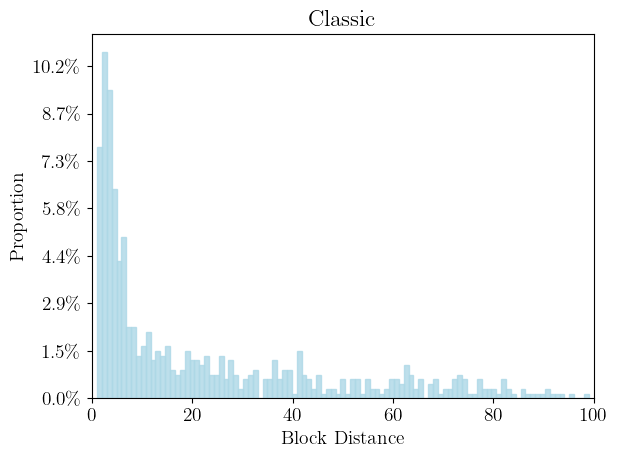

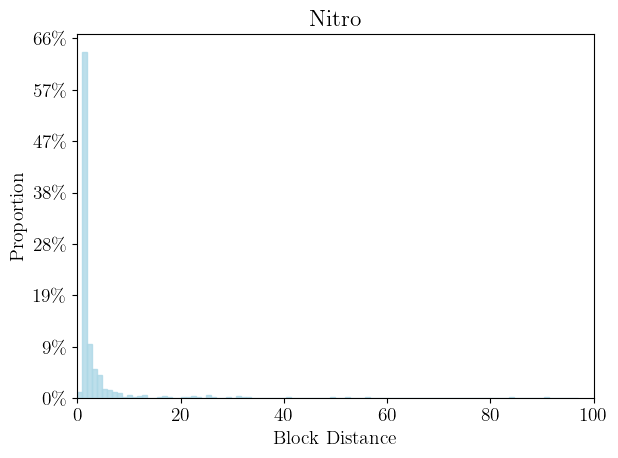

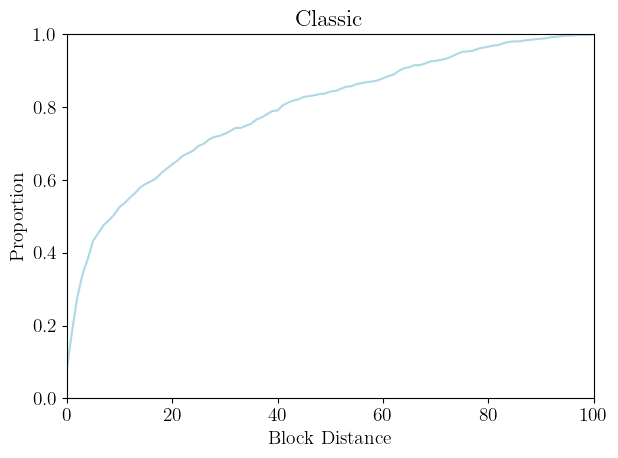

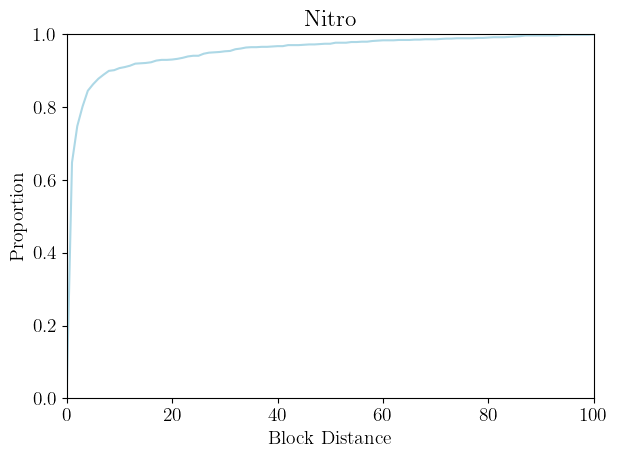

In [37]:
fig, ax = plt.subplots()
plt.title("Classic")
ax.hist(arbitrum_classic_liquidation_block_distances, edgecolor='LightBlue', color='LightBlue', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(arbitrum_classic_liquidation_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Nitro")
ax.hist(arbitrum_nitro_liquidation_block_distances, edgecolor='LightBlue', color='LightBlue', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(arbitrum_nitro_liquidation_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Classic")
count, bins_count = np.histogram(arbitrum_classic_liquidation_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='LightBlue') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Nitro")
count, bins_count = np.histogram(arbitrum_nitro_liquidation_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='LightBlue') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## Optimism

In [38]:
cursor = mongo_connection["optimism"]["mev_liquidation_opportunities"].find()
optimism_pre_bedrock_liquidation_block_distances = list()
optimism_post_bedrock_liquidation_block_distances = list()
optimism_liquidation_total = 0
for document in cursor:
    optimism_liquidation_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] != None:
            if opportunity["liquidation"]["block_number"] < 105235063:
                optimism_pre_bedrock_liquidation_block_distances.append(opportunity["oracle_update"]["distance"])
            else:
                optimism_post_bedrock_liquidation_block_distances.append(opportunity["oracle_update"]["distance"])

In [39]:
print("Block Distance", "\t", "Count (Pre-Bedrock)", "\t",  "Count (Post-Bedrock)")
print("--------------------------------------------------------------------------")
for i in range(101):
    print(i, "\t\t", optimism_pre_bedrock_liquidation_block_distances.count(i), "\t\t\t", optimism_post_bedrock_liquidation_block_distances.count(i))
print("--------------------------------------------------------------------------")
print("Total", "\t\t", len(optimism_pre_bedrock_liquidation_block_distances), "\t\t\t", len(optimism_post_bedrock_liquidation_block_distances))

Block Distance 	 Count (Pre-Bedrock) 	 Count (Post-Bedrock)
--------------------------------------------------------------------------
0 		 0 			 12
1 		 192 			 99
2 		 140 			 99
3 		 147 			 10
4 		 134 			 10
5 		 110 			 9
6 		 66 			 7
7 		 66 			 5
8 		 49 			 8
9 		 38 			 4
10 		 48 			 4
11 		 51 			 4
12 		 40 			 8
13 		 27 			 4
14 		 26 			 1
15 		 34 			 0
16 		 30 			 2
17 		 22 			 4
18 		 17 			 2
19 		 25 			 3
20 		 25 			 1
21 		 21 			 1
22 		 15 			 0
23 		 16 			 1
24 		 17 			 0
25 		 13 			 1
26 		 13 			 0
27 		 14 			 0
28 		 10 			 0
29 		 14 			 2
30 		 12 			 0
31 		 9 			 0
32 		 14 			 0
33 		 14 			 0
34 		 8 			 0
35 		 8 			 1
36 		 8 			 1
37 		 7 			 0
38 		 2 			 0
39 		 6 			 0
40 		 7 			 3
41 		 8 			 0
42 		 5 			 0
43 		 9 			 0
44 		 8 			 0
45 		 1 			 1
46 		 3 			 1
47 		 5 			 0
48 		 6 			 0
49 		 7 			 0
50 		 4 			 0
51 		 4 			 0
52 		 2 			 0
53 		 3 			 0
54 		 5 			 0
55 		 2 			 0
56 		 3 			 0
57 		 4 			 0
58 		 5 			 1
59 		 4

In [40]:
print("Total number of liquidations:", optimism_liquidation_total)
print("Number of detected opportunities:", len(optimism_pre_bedrock_liquidation_block_distances+optimism_post_bedrock_liquidation_block_distances), "("+str(round(len(optimism_pre_bedrock_liquidation_block_distances+optimism_post_bedrock_liquidation_block_distances)/optimism_liquidation_total*100.0))+"%)")

Total number of liquidations: 5347
Number of detected opportunities: 2001 (37%)


In [41]:
cursor = mongo_connection["optimism"]["mev_liquidation_opportunities"].find()
optimism_tx_distances_liquidation = list()
special_cases = list()
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] == 0:
            if len(opportunity["oracle_update"]["transactions"]) > 0:
                shortest_distance = None
                for transaction in opportunity["oracle_update"]["transactions"]:
                    if transaction["transaction_index"] != None:
                        if shortest_distance == None or opportunity["liquidation"]["transaction_index"] - transaction["transaction_index"] < shortest_distance:
                            shortest_distance = opportunity["liquidation"]["transaction_index"]-transaction["transaction_index"]
                if shortest_distance != None:
                    special_cases.append(opportunity)
                    optimism_tx_distances_liquidation.append(shortest_distance)

Number of transaction distances measured: 12
Number of transaction distances of 1: 1 (8%)
Min transaction distance found: 1
Max transaction distance found: 18


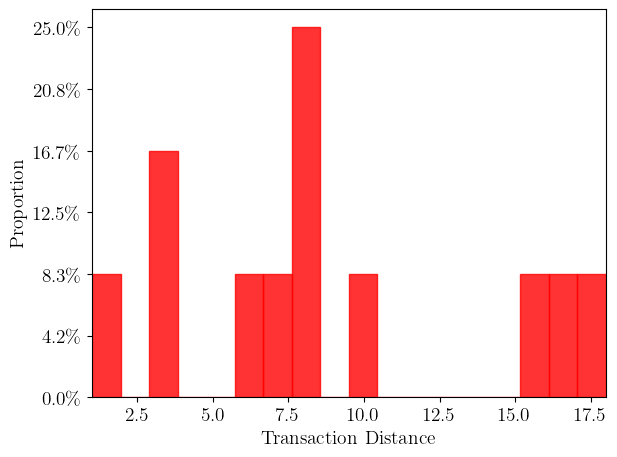

In [42]:
print("Number of transaction distances measured:", len(optimism_tx_distances_liquidation))
print("Number of transaction distances of 1:", optimism_tx_distances_liquidation.count(1), "("+str(round(optimism_tx_distances_liquidation.count(1)/len(optimism_tx_distances_liquidation)*100.0))+"%)")
print("Min transaction distance found:", min(optimism_tx_distances_liquidation))
print("Max transaction distance found:", max(optimism_tx_distances_liquidation))

fig, ax = plt.subplots()
ax.hist(optimism_tx_distances_liquidation, edgecolor='red', color='red', alpha=0.8, bins=max(optimism_tx_distances_liquidation))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_tx_distances_liquidation)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(optimism_tx_distances_liquidation), max(optimism_tx_distances_liquidation))
fig.tight_layout()
plt.show()

In [43]:
from datetime import datetime

bot_contracts = set()
special_blocks = set()
sorted_special_cases = sorted(special_cases, key=lambda d: d["liquidation"]["block_number"]) 
for special_case in sorted_special_cases:
    special_blocks.add(special_case["liquidation"]["block_number"])
    liquidation = mongo_connection["optimism"]["mev_liquidation_results"].find_one({"transaction.hash": special_case["liquidation"]["transaction_hash"]})
    profit = "???"
    if liquidation["total_profit_usd"]:
        profit = round(liquidation["total_profit_usd"])
    bot_contracts.add(liquidation["transaction"]["to"])
    print(special_case["liquidation"]["block_number"], liquidation["transaction"]["to"], datetime.utcfromtimestamp(special_case["liquidation"]["timestamp"]).strftime('%Y-%m-%d %H:%M:%S'), profit, "USD", special_case["liquidation"]["transaction_index"], special_case["oracle_update"]["transactions"][0]["transaction_index"], special_case["liquidation"]["transaction_hash"])

print()
for bot in bot_contracts:
    print(bot)
    cursor = mongo_connection["optimism"]["mev_liquidation_results"].find({"transaction.to": bot}).sort([("block_number", pymongo.ASCENDING)])
    for document in cursor:
        if document["block_number"] not in special_blocks:
            result = mongo_connection["optimism"]["mev_liquidation_opportunities"].find_one({"opportunities.liquidation.transaction_hash": document["transaction"]["hash"]})
            print(document["block_number"], [opportunity["oracle_update"]["distance"] for opportunity in result["opportunities"]])
        else:
            print(document["block_number"], "*")
    print()

106857873 0x4b94062FeDd0dAe7B623Ad5E56c026a7Db5e3021 2023-07-14 06:02:03 ??? USD 16 6 0xe5da50cd2e4dbf059cee48566dd537b56bbe642832683c52f568e0032170af5d
106857918 0x4b94062FeDd0dAe7B623Ad5E56c026a7Db5e3021 2023-07-14 06:03:33 ??? USD 25 9 0x7ed8786d1c8d820c151e0426bcf3310f015cb2d64934b277cdb56ace862bf706
106857918 0x4b94062FeDd0dAe7B623Ad5E56c026a7Db5e3021 2023-07-14 06:03:33 ??? USD 26 9 0x010e573f7fea7122729d8ce998f34413a3945db8b827ecf08d70b310cbead87b
106873227 0x4b94062FeDd0dAe7B623Ad5E56c026a7Db5e3021 2023-07-14 14:33:51 ??? USD 8 5 0x1ecdb26563b2c27a6cc3a4fa3a3efebf5ebf908f3983583838ad2b93b2af4293
107462235 0x9999B9D51D85b0fe783efDdeD7d967545001f78f 2023-07-28 05:47:27 0 USD 27 9 0xac3eb23b6adc6f5dae796a7581e3882491a87eb6d362493da6584284d5041e54
108354893 0x408B158ba3cCDddC0D33c4369FB64E10bfD1065F 2023-08-17 21:42:43 ??? USD 35 27 0x5e7a5ed4f889ab5650209966afa055007a74a934a55941b5833c96dbce93bb44
108354894 0x4b94062FeDd0dAe7B623Ad5E56c026a7Db5e3021 2023-08-17 21:42:45 606 USD 35 

Number of transaction indexes measured: 99
Number of transaction indexes of 1: 36 (36%)
Min transaction index found: 1
Max transaction index found: 28


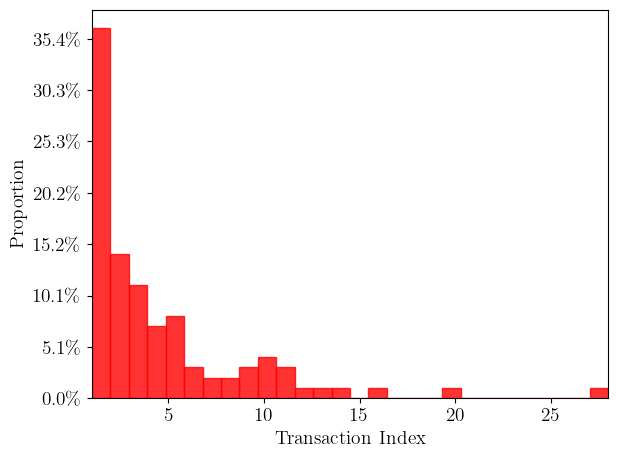

[(2645052797, 5), (2674000000, 4), (46287829636, 1), (8469013096, 2)]
True
[(22639205622, 3), (4531703385, 4)]
True
[(104918819, 2), (105749647, 1)]
True
[(2674000000, 1), (262560168, 2)]
True
[(107086695, 3), (62748367, 5)]
True
[(188, 10), (188, 11)]
True
[(727650623, 16), (314799082, 28)]
True
[(8818065826, 1), (8818065826, 2)]
True
[(82489600600, 1), (13885047394, 2), (13885047394, 3), (13885047394, 4)]
True
[(33455110719, 1), (846621206, 5), (528464719, 7)]
True
[(893587701, 8), (656063003, 10), (359629312, 11)]
True
[(1112689261, 12), (4774000000, 5)]
True


In [44]:
cursor = mongo_connection["optimism"]["mev_liquidation_opportunities"].find()
transaction_indexes = list()
blocks = dict()
for document in cursor:
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] == 1 and opportunity["liquidation"]["block_number"] >= 105235063:
            transaction_indexes.append(opportunity["liquidation"]["transaction_index"])
            if not opportunity["liquidation"]["block_number"] in blocks:
                blocks[opportunity["liquidation"]["block_number"]] = list()
            blocks[opportunity["liquidation"]["block_number"]].append((opportunity["liquidation"]["gas_price"], opportunity["liquidation"]["transaction_index"]))

print("Number of transaction indexes measured:", len(transaction_indexes))
print("Number of transaction indexes of 1:", transaction_indexes.count(1), "("+str(round(transaction_indexes.count(1)/len(transaction_indexes)*100.0))+"%)")
print("Min transaction index found:", min(transaction_indexes))
print("Max transaction index found:", max(transaction_indexes))

fig, ax = plt.subplots()
ax.hist(transaction_indexes, edgecolor='red', color='red', alpha=0.8, bins=max(transaction_indexes))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(transaction_indexes)))
ax.set_xlabel('Transaction Index')
ax.set_ylabel('Proportion')
ax.set_xlim(min(optimism_tx_distances_liquidation), max(transaction_indexes))
fig.tight_layout()
plt.show()

for block in blocks:
    if len(blocks[block]) > 1:
        print(blocks[block])
        blocks[block].sort(key=lambda a: a[1])
        all_ordered_by_gas = True
        previous = None
        for current in blocks[block]:
            if previous != None and current[0] > previous:
                all_ordered_by_gas = False
            previous = current[0]
        print(all_ordered_by_gas)
        

Number of transaction distances measured: 12
Number of transaction distances of 1: 1 (8%)
Min transaction distance found: 1
Max transaction distance found: 18


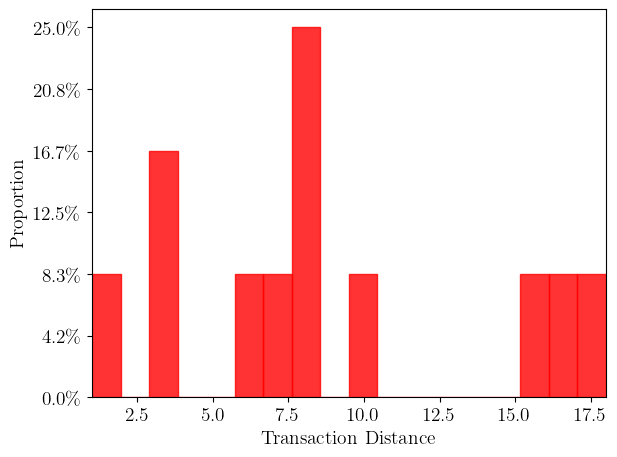

In [45]:
print("Number of transaction distances measured:", len(optimism_tx_distances_liquidation))
print("Number of transaction distances of 1:", optimism_tx_distances_liquidation.count(1), "("+str(round(optimism_tx_distances_liquidation.count(1)/len(optimism_tx_distances_liquidation)*100.0))+"%)")
print("Min transaction distance found:", min(optimism_tx_distances_liquidation))
print("Max transaction distance found:", max(optimism_tx_distances_liquidation))

fig, ax = plt.subplots()
ax.hist(optimism_tx_distances_liquidation, edgecolor='red', color='red', alpha=0.8, bins=max(optimism_tx_distances_liquidation))
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_tx_distances_liquidation)))
ax.set_xlabel('Transaction Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(min(optimism_tx_distances_liquidation), max(optimism_tx_distances_liquidation))
fig.tight_layout()
plt.show()

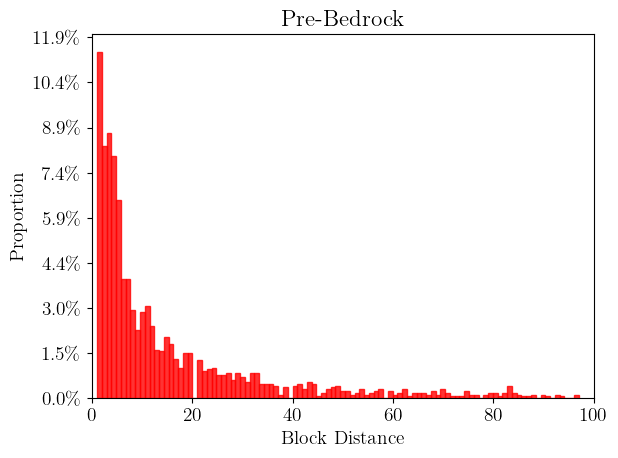

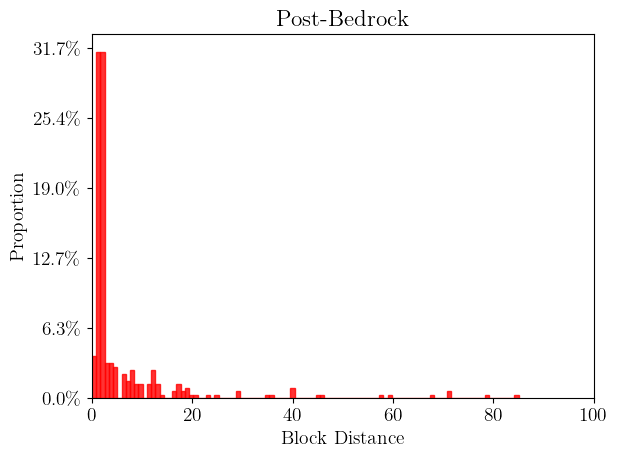

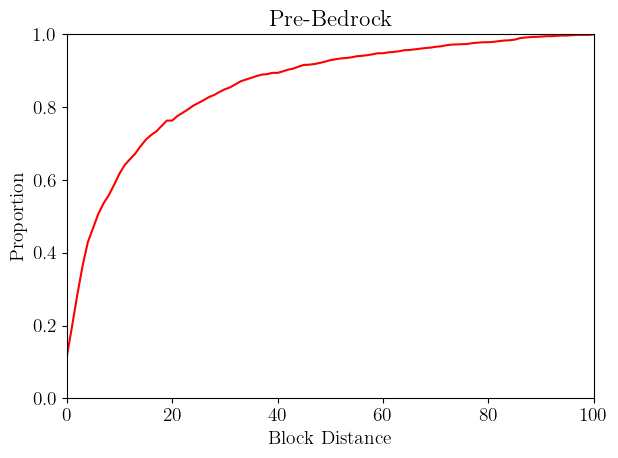

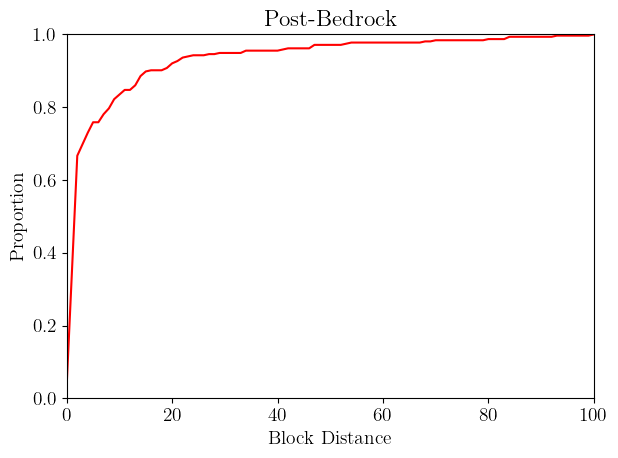

In [46]:
fig, ax = plt.subplots()
plt.title("Pre-Bedrock")
ax.hist(optimism_pre_bedrock_liquidation_block_distances, edgecolor='red', color='red', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_pre_bedrock_liquidation_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Post-Bedrock")
ax.hist(optimism_post_bedrock_liquidation_block_distances, edgecolor='red', color='red', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(optimism_post_bedrock_liquidation_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Pre-Bedrock")
count, bins_count = np.histogram(optimism_pre_bedrock_liquidation_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='red') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
plt.title("Post-Bedrock")
count, bins_count = np.histogram(optimism_post_bedrock_liquidation_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='red') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## zkSync

In [47]:
cursor = mongo_connection["zksync"]["mev_liquidation_opportunities"].find()
zksync_liquidation_block_distances = list()
zksync_liquidation_total = 0
for document in cursor:
    zksync_liquidation_total += 1
    for opportunity in document["opportunities"]:
        if opportunity["oracle_update"]["distance"] != None:
            zksync_liquidation_block_distances.append(opportunity["oracle_update"]["distance"])

In [48]:
print("Block Distance", "\t", "Count")
print("-----------------------------")
for i in range(101):
    print(i, "\t\t", zksync_liquidation_block_distances.count(i))
print("-----------------------------")
print("Total", "\t\t", len(zksync_liquidation_block_distances))

Block Distance 	 Count
-----------------------------
0 		 0
1 		 25
2 		 16
3 		 8
4 		 6
5 		 7
6 		 5
7 		 5
8 		 3
9 		 1
10 		 0
11 		 2
12 		 1
13 		 0
14 		 0
15 		 0
16 		 0
17 		 1
18 		 4
19 		 1
20 		 0
21 		 1
22 		 1
23 		 1
24 		 2
25 		 0
26 		 0
27 		 0
28 		 1
29 		 0
30 		 0
31 		 0
32 		 0
33 		 0
34 		 2
35 		 0
36 		 0
37 		 1
38 		 0
39 		 0
40 		 0
41 		 0
42 		 0
43 		 0
44 		 1
45 		 0
46 		 0
47 		 0
48 		 0
49 		 0
50 		 1
51 		 0
52 		 0
53 		 0
54 		 0
55 		 0
56 		 0
57 		 0
58 		 0
59 		 0
60 		 0
61 		 0
62 		 0
63 		 1
64 		 1
65 		 0
66 		 0
67 		 0
68 		 0
69 		 0
70 		 0
71 		 0
72 		 0
73 		 0
74 		 0
75 		 0
76 		 0
77 		 0
78 		 1
79 		 0
80 		 1
81 		 0
82 		 0
83 		 0
84 		 0
85 		 0
86 		 1
87 		 0
88 		 0
89 		 0
90 		 1
91 		 0
92 		 0
93 		 0
94 		 1
95 		 0
96 		 1
97 		 0
98 		 0
99 		 0
100 		 0
-----------------------------
Total 		 104


In [49]:
print("Total number of liquidations:", zksync_liquidation_total)
print("Number of detected opportunities:", len(zksync_liquidation_block_distances), "("+str(round(len(zksync_liquidation_block_distances)/zksync_liquidation_total*100.0))+"%)")

Total number of liquidations: 325
Number of detected opportunities: 104 (32%)


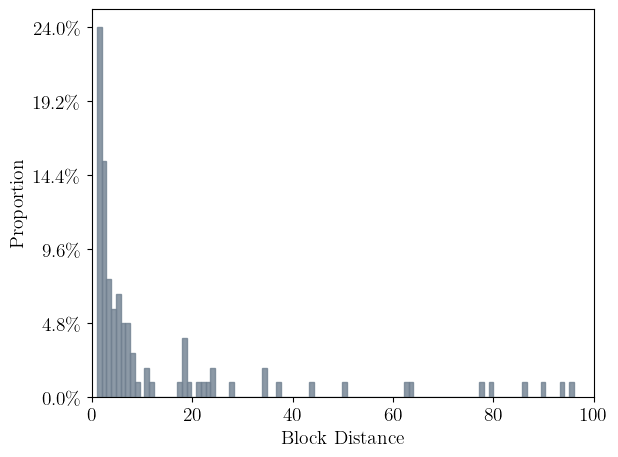

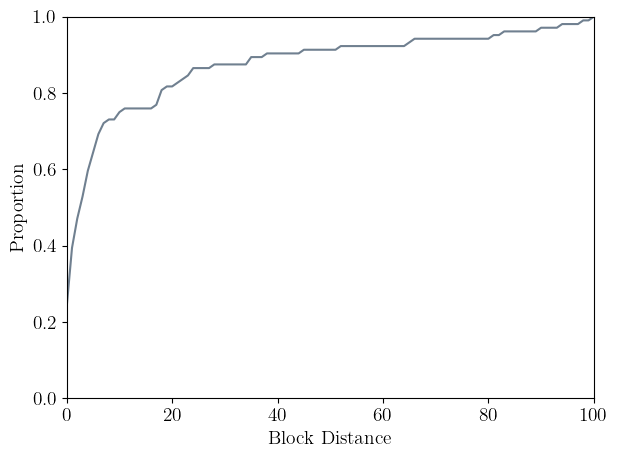

In [50]:
fig, ax = plt.subplots()
ax.hist(zksync_liquidation_block_distances, edgecolor='slategrey', color='slategrey', alpha=0.8, bins=101)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(len(zksync_liquidation_block_distances)))
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
fig.tight_layout()
plt.show()

fig, ax = plt.subplots()
count, bins_count = np.histogram(zksync_liquidation_block_distances, bins=101) 
pdf = count / sum(count) 
cdf = np.cumsum(pdf) 
ax.plot(cdf, color='slategrey') 
ax.set_xlabel('Block Distance')
ax.set_ylabel('Proportion')
ax.set_xlim(0, 100)
ax.set_ylim(0, 1)
fig.tight_layout()
plt.show()

## CDF

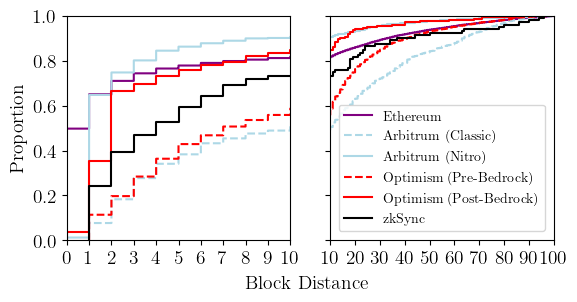

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(6, 4))

fig.set_figheight(3)

ethereum_block_distances = ethereum_liquidation_block_distances 

arbitrum_classic_block_distances = arbitrum_classic_liquidation_block_distances 
arbitrum_nitro_block_distances = arbitrum_nitro_liquidation_block_distances

optimism_pre_bedrock_block_distances = optimism_pre_bedrock_liquidation_block_distances 
optimism_post_bedrock_block_distances = optimism_post_bedrock_liquidation_block_distances 

zksync_block_distances = zksync_liquidation_block_distances 

sns.ecdfplot(data=ethereum_block_distances, ax=ax1, label="Ethereum", color='purple')
sns.ecdfplot(data=ethereum_block_distances, ax=ax2, color='purple')

sns.ecdfplot(data=arbitrum_classic_block_distances, ax=ax1, label="Arbitrum (Classic)", linestyle='dashed', color='LightBlue')
sns.ecdfplot(data=arbitrum_classic_block_distances, ax=ax2, linestyle='dashed', color='LightBlue')
sns.ecdfplot(data=arbitrum_nitro_block_distances, ax=ax1, label="Arbitrum (Nitro)", color='LightBlue')
sns.ecdfplot(data=arbitrum_nitro_block_distances, ax=ax2, color='LightBlue')

sns.ecdfplot(data=optimism_pre_bedrock_block_distances, ax=ax1, label="Optimism (Pre-Bedrock)", linestyle='dashed', color='red')
sns.ecdfplot(data=optimism_pre_bedrock_block_distances, ax=ax2, linestyle='dashed', color='red')
sns.ecdfplot(data=optimism_post_bedrock_block_distances, ax=ax1, label="Optimism (Post-Bedrock)", color='red')
sns.ecdfplot(data=optimism_post_bedrock_block_distances, ax=ax2, color='red')

sns.ecdfplot(data=zksync_block_distances, ax=ax1, label="zkSync", color='black')
sns.ecdfplot(data=zksync_block_distances, ax=ax2, color='black')

ax1.set_xlim(0, 10)
ax1.set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax2.set_xlim(10, 100)
ax2.set_xticks([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
ax1.set_ylim(0, 1)
ax2.set_ylim(0, 1)
ax1.set(xlabel=None)
ax2.set(xlabel=None)
text = fig.text(0.53, 0, 'Block Distance', ha='center')

legend = fig.legend(bbox_to_anchor=(0.7545, 0.635), loc='upper center', frameon=True, ncol=1, prop={"size": 10})
plt.tight_layout()
plt.show()
fig.savefig('figure_7.png', bbox_extra_artists=(legend, text), bbox_inches='tight', facecolor='white', transparent=True, dpi=1000)